In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_boss = pd.read_csv("Datos\Prueba_conección_MLider\Run0_list.txt", delim_whitespace=True, skiprows=9, names=["Brd", "Ch", "LG", "HG", "Tstamp_us", "TrgID", "NHits"], engine="python")
df_sub = pd.read_csv("Datos\Prueba_conección_MSubdito\Run0_list.txt", delim_whitespace=True, skiprows=9, names=["Brd", "Ch", "LG", "HG", "Tstamp_us", "TrgID", "NHits"], engine="python")

In [5]:
df_boss

,Brd,Ch,LG,HG,Tstamp_us,TrgID,NHits
0,0,0,49,60,2438.664,0.0,64.0
1,0,1,55,50,NaN,NaN,NaN
2,0,2,47,45,NaN,NaN,NaN
3,0,3,54,56,NaN,NaN,NaN
4,0,4,49,51,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3719163,0,59,4066,4036,NaN,NaN,NaN
3719164,0,60,3998,4022,NaN,NaN,NaN
3719165,0,61,139,1033,NaN,NaN,NaN
3719166,0,62,135,1017,NaN,NaN,NaN


In [6]:
df_sub

,Brd,Ch,LG,HG,Tstamp_us,TrgID,NHits
0,0,0,26,32,6907691.944,0.0,64.0
1,0,1,22,19,NaN,NaN,NaN
2,0,2,20,21,NaN,NaN,NaN
3,0,3,20,17,NaN,NaN,NaN
4,0,4,25,19,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3719291,0,59,4015,4058,NaN,NaN,NaN
3719292,0,60,4042,4058,NaN,NaN,NaN
3719293,0,61,107,902,NaN,NaN,NaN
3719294,0,62,97,877,NaN,NaN,NaN


In [ ]:
# Elimina los vacios y se resta los tiempos de los disparos respecto al primero, tambien se resetea el indice
boss_time = (df_boss["Tstamp_us"].dropna()- df_boss["Tstamp_us"].dropna()[0])/1
sub_time = (df_sub["Tstamp_us"].dropna()- df_sub["Tstamp_us"].dropna()[0])/1
boss_time = boss_time.reset_index(drop=True)
sub_time = sub_time.reset_index(drop=True)
boss_time

0        0.000000e+00
1        1.575784e+03
2        1.157576e+04
3        2.157574e+04
4        3.157570e+04
             ...     
58107    5.399602e+08
58108    5.399702e+08
58109    5.399802e+08
58110    5.399902e+08
58111    5.400002e+08
Name: Tstamp_us, Length: 58112, dtype: float64

In [21]:
sub_time

0        0.000000e+00
1        1.575784e+03
2        1.157576e+04
3        2.157574e+04
4        3.157572e+04
             ...     
58109    5.399805e+08
58110    5.399905e+08
58111    5.400005e+08
58112    5.400105e+08
58113    5.400205e+08
Name: Tstamp_us, Length: 58114, dtype: float64

diferencia de timpos por disparo entre matrices

Text(0, 0.5, '|Δt| [μs]')

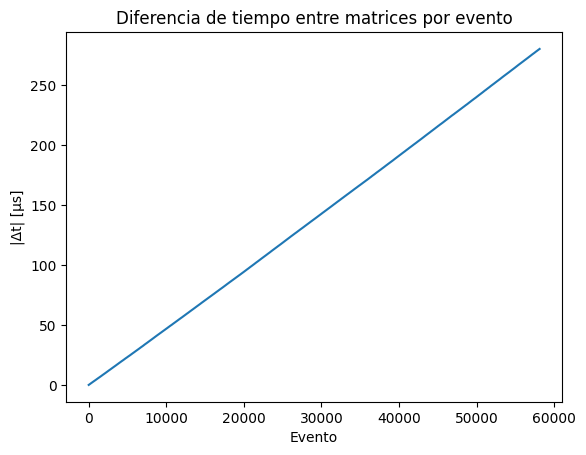

In [24]:
ceros = []
lista = []
for i in range(len(boss_time)-1):
    lista.append(sub_time[i]-boss_time[i])
    ceros.append(i)
    
plt.plot(ceros, lista)
plt.title("Diferencia de tiempo entre matrices por evento")
plt.xlabel("Evento")
plt.ylabel("|Δt| [μs]")